In [ ]:
# /content/drive/MyDrive/Colab Notebooks/Data-Set/spotify.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_spotify = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data-Set/spotify.csv")

In [ ]:
df_spotify

In [ ]:
len(df_spotify['Track ID'].unique())

413

In [17]:
# there are few duplicate tracks in the data set,
# clean duplicate data based on Track ID

df_no_duplicates = df_spotify.drop_duplicates(subset=['Track ID'])
df_no_duplicates

,Artist,Track Name,Popularity,Duration (ms),Track ID,genere,danceability
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6,pop,0.751
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0,rock,0.434
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE,country,0.529
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU,metal,0.551
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe,pop,0.614
...,...,...,...,...,...,...,...
433,French Montana,Stand United,54,163971,01CHrTerCzyRpMI1MzQ4fz,metal,0.779
434,Jason Derulo,Tip Toe (feat. French Montana),65,187521,0TY3jVGwGDwDabLyQLVRQQ,pop,0.751
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT,hip hop,0.607
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS,Dance/Electronic,0.860


Spotify Data Set

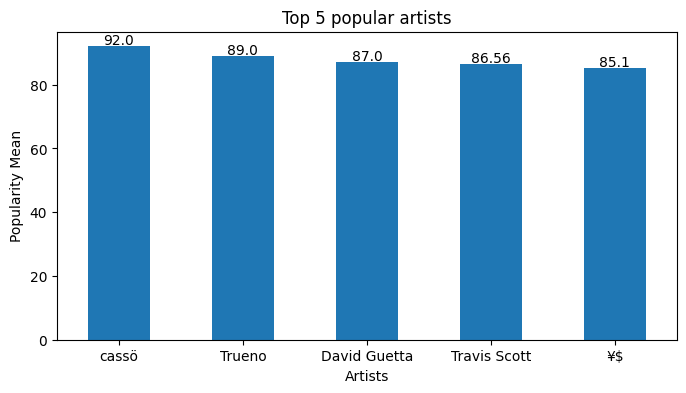

In [80]:
# Q1. Identify the top 5 popular artists based on the mean popularity of their tracks.
# Show the mean popularity of tracks for the top 5 popular artists Using BarPlot.

# part1 : top 5 popular artists based on the mean popularity of their tracks
list_top_artist = pd.DataFrame(df_no_duplicates.groupby('Artist')[['Popularity']].mean()['Popularity'].sort_values(ascending=False).head(5))
# list_top_artist.columns
# part2 :Show the mean popularity of tracks for the top 5 popular artists Using BarPlot.
list_top_artist['Popularity'].plot(kind='bar', figsize=(8, 4), title='Top 5 popular artists')
plt.xlabel("Artists")
plt.ylabel("Popularity Mean")
plt.xticks(rotation=0)
for i, value in enumerate(list_top_artist['Popularity']):
    plt.text(i, value + 0.5, str(round(value,2)), ha='center')
plt.show()




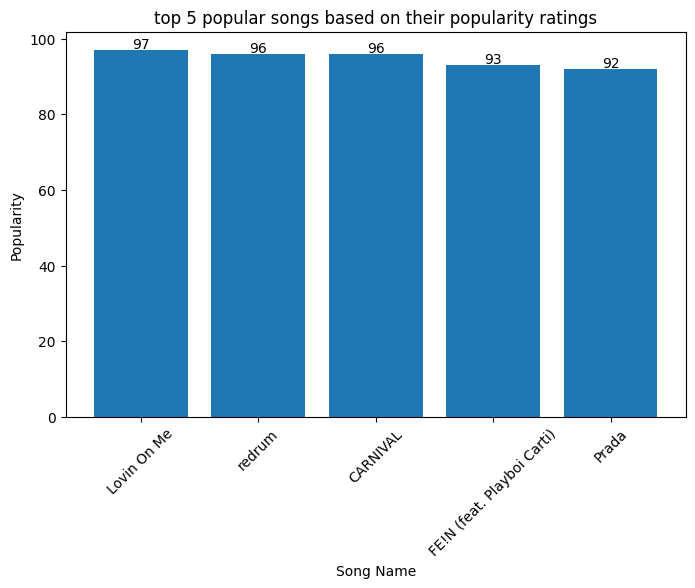

In [82]:
# Q2 Determine the top 5 popular songs based on their popularity ratings.Display the popularity ratings of the top 5 popular songs using BarPlot.

df_temp = df_no_duplicates.sort_values(ascending=False,by="Popularity")[['Track Name','Popularity']].head(5)
categories = df_temp['Track Name']
values = df_temp['Popularity']
plt.figure(figsize=(8,5))
# Create bar chart
plt.bar(categories, values)

# Add labels and title

plt.xlabel('Song Name')
plt.ylabel('Popularity')
plt.title('top 5 popular songs based on their popularity ratings')
for i, value in enumerate(df_temp['Popularity']):
    plt.text(i, value + 0.5, str(round(value,2)), ha='center')
plt.xticks(rotation=45)

# Display the plot
plt.show()


top 5 genere as per mean popularity ['pop', 'rock', 'country', 'metal', 'hip hop']



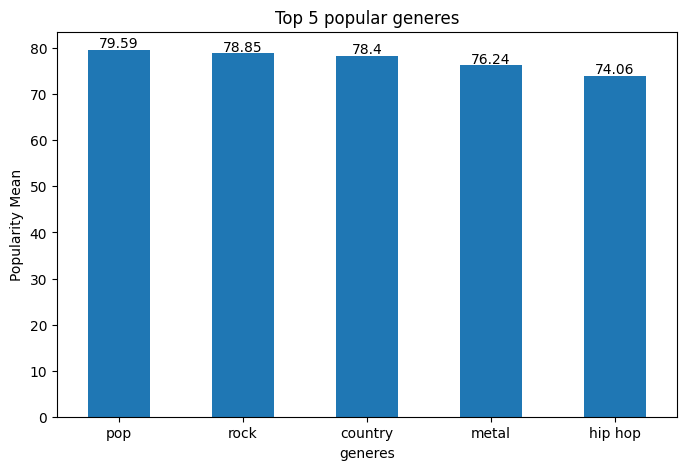

In [79]:
# 3. Find the top 5 trending genres based on the mean popularity of tracks within each genre.
#   Visualize the mean popularity of tracks for the top 5 trending genres.

# as perovieded dataset does not have any genre info , using one more data set available in public domain and added the genres coulmmn in the provided dataset

# part1 : Find the top 5 trending genres based on the mean popularity of tracks within each genre.
list_top_genre = pd.DataFrame(df_no_duplicates.groupby('genere')[['Popularity']].mean()['Popularity'].sort_values(ascending=False).head(5))
# list_top_genre
index_values =list(list_top_genre.index)
print(f"top 5 genere as per mean popularity {index_values}")
print()

list_top_genre['Popularity'].plot(kind='bar', figsize=(8, 5), title='Top 5 popular generes')
plt.xlabel("generes")
plt.ylabel("Popularity Mean")
plt.xticks(rotation=0)
for i, value in enumerate(list_top_genre['Popularity']):
    plt.text(i, value + 0.5, str(round(value,2)), ha='center')
plt.show()

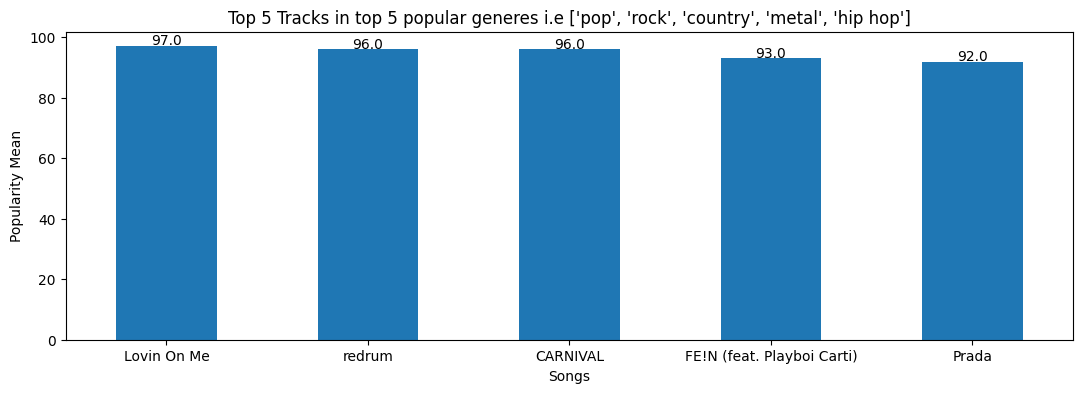

In [118]:
# # Visualize the mean popularity of tracks for the top 5 trending genres.
# filter data for the top 5 genere
df_temp = df_no_duplicates[df_no_duplicates['genere'].isin(list_top_genre.index)]
list_top_tracks = pd.DataFrame(df_temp.groupby('Track Name')[['Popularity']].mean()['Popularity'].sort_values(ascending=False).head(5))
# list_top_genre
index_values =list(list_top_tracks.index)

list_top_tracks['Popularity'].plot(kind='bar', figsize=(13, 4))
plt.title(f"Top 5 Tracks in top 5 popular generes i.e {list(list_top_genre.index)}")
plt.xlabel("Songs")
plt.ylabel("Popularity Mean")
plt.xticks(rotation=0)
for i, value in enumerate(list_top_tracks['Popularity']):
    plt.text(i, value + 0.5, str(round(value,2)), ha='center')
plt.show()

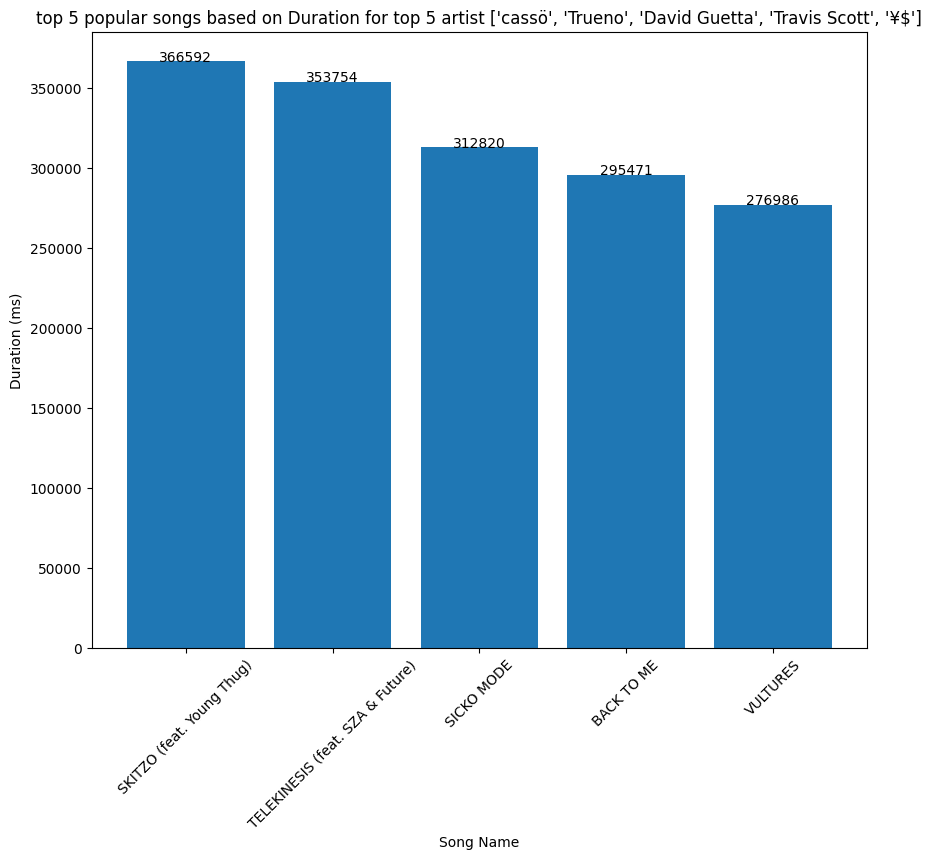

In [114]:
# 4. Identify the top 5 longest songs among the tracks of the top 5 popular artists.
# Represent the duration of the top 5 longest songs among the tracks of the top 5 popular artists using BarPlot.
pd.set_option('display.max_rows', 10)
df_no_duplicates


#top 5 popular artists as per the mean popularity of the tracks
list_top_5_popular_artist = pd.DataFrame(df_no_duplicates.groupby('Artist')[['Popularity']].mean()['Popularity'].sort_values(ascending=False).head(5))

#Identify the top 5 longest songs among the tracks of the top 5 popular artists.
# filter the data set for top 5 filter artists
df_temp = df_no_duplicates[df_no_duplicates['Artist'].isin(list_top_5_popular_artist.index)]
# sort the data by dutarion
list_top_5_longest_song = df_temp.sort_values(by="Duration (ms)", ascending=False).head(5)
list_top_5_longest_song
# bar plot
categories = list_top_5_longest_song['Track Name']
values = list_top_5_longest_song['Duration (ms)']
plt.figure(figsize=(10,8))
# Create bar chart
plt.bar(categories, values)

# Add labels and title

plt.xlabel('Song Name')
plt.ylabel('Duration (ms)')
plt.title(f'top 5 popular songs based on Duration for top 5 artist i.e {list(list_top_5_popular_artist.index)}')
for i, value in enumerate(list_top_5_longest_song['Duration (ms)']):
    plt.text(i, value + 0.5, value, ha='center')
plt.xticks(rotation=45)

# Display the plot
plt.show()


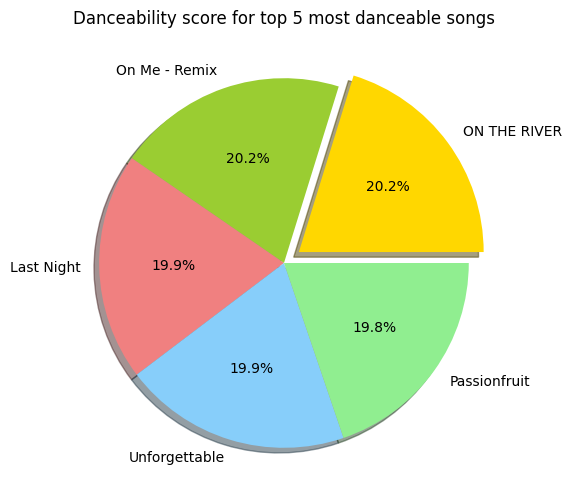

In [130]:
# 5. Determine the top 5 most danceable songs based on their danceability scores.
# Illustrate the danceability scores of the top 5 most danceable songs using PieChart.


# as perovieded dataset does not have any danceability info , using one more data set available in public domain and added the danceability coulmmn in the provided dataset

# part1:
# top 5 most danceable songs based on their danceability scores
list_top5_danceablity_songs = df_no_duplicates.sort_values(by="danceability", ascending=False).head(5)
# Data to plot
labels = list_top5_danceablity_songs["Track Name"]
sizes = list_top5_danceablity_songs["danceability"]
colors =['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']
explode = (0.1, 0, 0, 0, 0)

# Plot
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Danceability score for top 5 most danceable songs')
plt.show()